In [80]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

In [81]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)        # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/DIN_budgetv2/'

first_year = 2014
last_year  = 2014
years      = np.arange(first_year,last_year+1,1)

months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [82]:
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

In [83]:
depth = mesh.zlevs
ind_max_depth = 18
depth = depth[0:18]
depth

array([ -0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       115., 135., 160., 190., 230., 280., 340.])

In [97]:
print 'calculate seasonal cyles...'

# V2 -> u.d(N) -> MEAN
# remote horizontal effect

print 'calculate H.ADV...'
tracername = 'HADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv2_all    = f1.variables['ADVH'][:,ind_all,:16]
a = np.ones(np.shape(hadv2_all))
a[None,None,:] = np.diff(depth[0:17])
hadv2_all = hadv2_all * a
hadv2_all    = np.nanmean(hadv2_all, axis=1) 
hadv2_all    = np.nansum(hadv2_all, axis=1)

hadv2_eu    = f1.variables['ADVH'][:,ind_eu,:16]
a = np.ones(np.shape(hadv2_eu))
a[None,None,:] = np.diff(depth[0:17])
hadv2_eu = hadv2_eu * a
hadv2_eu    = np.nanmean(hadv2_eu, axis=1) 
hadv2_eu    = np.nansum(hadv2_eu, axis=1)

hadv2_am    = f1.variables['ADVH'][:,ind_am,:16]
a = np.ones(np.shape(hadv2_am))
a[None,None,:] = np.diff(depth[0:17])
hadv2_am = hadv2_am * a
hadv2_am    = np.nanmean(hadv2_am, axis=1) 
hadv2_am    = np.nansum(hadv2_am, axis=1)

hadv2_sl    = f1.variables['ADVH'][:,ind_sl,:16]
a = np.ones(np.shape(hadv2_sl))
a[None,None,:] = np.diff(depth[0:17])
hadv2_sl = hadv2_sl * a
hadv2_sl    = np.nanmean(hadv2_sl, axis=1) 
hadv2_sl    = np.nansum(hadv2_sl, axis=1)

# remote vertical effect
print 'calculate V.ADV...'
tracername = 'VADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv2_all    = f1.variables['VADV'][:,ind_all,:16]
a = np.ones(np.shape(vadv2_all))
a[None,None,:] = np.diff(depth[0:17])
vadv2_all = vadv2_all * a
vadv2_all    = np.nanmean(vadv2_all, axis=1) 
vadv2_all    = np.nansum(vadv2_all, axis=1)

vadv2_eu    = f1.variables['VADV'][:,ind_eu,:16]
a = np.ones(np.shape(vadv2_eu))
a[None,None,:] = np.diff(depth[0:17])
vadv2_eu = vadv2_eu * a
vadv2_eu    = np.nanmean(vadv2_eu, axis=1) 
vadv2_eu    = np.nansum(vadv2_eu, axis=1)

vadv2_am    = f1.variables['VADV'][:,ind_am,:16]
a = np.ones(np.shape(vadv2_am))
a[None,None,:] = np.diff(depth[0:17])
vadv2_am = vadv2_am * a
vadv2_am    = np.nanmean(vadv2_am, axis=1) 
vadv2_am    = np.nansum(vadv2_am, axis=1)

vadv2_sl    = f1.variables['VADV'][:,ind_sl,:16]
a = np.ones(np.shape(vadv2_sl))
a[None,None,:] = np.diff(depth[0:17])
vadv2_sl = vadv2_sl * a
vadv2_sl    = np.nanmean(vadv2_sl, axis=1) 
vadv2_sl    = np.nansum(vadv2_sl, axis=1)


# V2 -> u' .d(N') -> EDDY
# submesoscale local effect
print 'calculate H.E.ADV...'
tracername = 'HEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedyv2_all    = f1.variables['HEDY'][:,ind_all,:16]
a = np.ones(np.shape(hedyv2_all))
a[None,None,:] = np.diff(depth[0:17])
hedyv2_all = hedyv2_all * a
hedyv2_all    = np.nanmean(hedyv2_all, axis=1) 
hedyv2_all    = np.nansum(hedyv2_all, axis=1)

hedyv2_eu    = f1.variables['HEDY'][:,ind_eu,:16]
a = np.ones(np.shape(hedyv2_eu))
a[None,None,:] = np.diff(depth[0:17])
hedyv2_eu = hedyv2_eu * a
hedyv2_eu    = np.nanmean(hedyv2_eu, axis=1) 
hedyv2_eu    = np.nansum(hedyv2_eu, axis=1)

hedyv2_am    = f1.variables['HEDY'][:,ind_am,:16]
a = np.ones(np.shape(hedyv2_am))
a[None,None,:] = np.diff(depth[0:17])
hedyv2_am = hedyv2_am * a
hedyv2_am    = np.nanmean(hedyv2_am, axis=1) 
hedyv2_am    = np.nansum(hedyv2_am, axis=1)

hedyv2_sl    = f1.variables['HEDY'][:,ind_sl,:16]
a = np.ones(np.shape(hedyv2_sl))
a[None,None,:] = np.diff(depth[0:17])
hedyv2_sl = hedyv2_sl * a
hedyv2_sl    = np.nanmean(hedyv2_sl, axis=1) 
hedyv2_sl    = np.nansum(hedyv2_sl, axis=1)


print 'calculate V.E.ADV...'
tracername = 'VEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv2_all    = f1.variables['VEDY'][:,ind_all,:16]
a = np.ones(np.shape(vedyv2_all))
a[None,None,:] = np.diff(depth[0:17])
vedyv2_all = vedyv2_all * a
vedyv2_all    = np.nanmean(vedyv2_all, axis=1) 
vedyv2_all    = np.nansum(vedyv2_all, axis=1)

vedyv2_eu    = f1.variables['VEDY'][:,ind_eu,:16]
a = np.ones(np.shape(vedyv2_eu))
a[None,None,:] = np.diff(depth[0:17])
vedyv2_eu = vedyv2_eu * a
vedyv2_eu    = np.nanmean(vedyv2_eu, axis=1) 
vedyv2_eu    = np.nansum(vedyv2_eu, axis=1)

vedyv2_am    = f1.variables['VEDY'][:,ind_am,:16]
a = np.ones(np.shape(vedyv2_am))
a[None,None,:] = np.diff(depth[0:17])
vedyv2_am = vedyv2_am * a
vedyv2_am    = np.nanmean(vedyv2_am, axis=1) 
vedyv2_am    = np.nansum(vedyv2_am, axis=1)

vedyv2_sl    = f1.variables['VEDY'][:,ind_sl,:16]
a = np.ones(np.shape(vedyv2_sl))
a[None,None,:] = np.diff(depth[0:17])
vedyv2_sl = vedyv2_sl * a
vedyv2_sl    = np.nanmean(vedyv2_sl, axis=1) 
vedyv2_sl    = np.nansum(vedyv2_sl, axis=1)

print 'done'

calculate seasonal cyles...
calculate H.ADV...
calculate V.ADV...
calculate H.E.ADV...
calculate V.E.ADV...
done


In [98]:
np.savez('monthly_fluxes.npz', vedyv2_all=vedyv2_all.data, vedyv2_eu=vedyv2_eu.data, vedyv2_am=vedyv2_am.data, vedyv2_sl=vedyv2_sl.data,\
        hadv2_all=hadv2_all.data,hadv2_eu=hadv2_eu.data,hadv2_am=hadv2_am.data,hadv2_sl=hadv2_sl.data,\
        vadv2_all=vadv2_all.data,vadv2_eu=vadv2_eu.data,vadv2_am=vadv2_am.data,vadv2_sl=vadv2_sl.data,\
        hedyv2_all=hedyv2_all.data, hedyv2_eu=hedyv2_eu.data, hedyv2_am=hedyv2_am.data, hedyv2_sl=hedyv2_sl.data)

In [99]:
vmix = np.load('VMIXv22014_Arc12_monthly.npy')
print(np.shape(vmix))

# conversion seconds to day, select upper 200m
# weighted average of each (already integrated) depth steps

a = np.ones(np.shape(vmix[:,ind_all,:17]))
a[None,None,:] = np.diff(depth[:]) # layer thickness
vmix_all = np.nanmean(vmix[:,ind_all,:17]*a,axis=1)*24*3600/np.max(depth)
vmix_all = np.nanmean(vmix_all, axis=1)

a = np.ones(np.shape(vmix[:,ind_eu,:17]))
a[None,None,:] = np.diff(depth[:])
vmix_eu = np.nanmean(vmix[:,ind_eu,:17]*a,axis=1)*24*3600/np.max(depth)
vmix_eu = np.nanmean(vmix_eu, axis=1)

a = np.ones(np.shape(vmix[:,ind_am,:17]))
a[None,None,:] = np.diff(depth[:])
vmix_am = np.nanmean(vmix[:,ind_am,:17]*a,axis=1)*24*3600/np.max(depth)
vmix_am = np.nanmean(vmix_am, axis=1)

a = np.ones(np.shape(vmix[:,ind_sl,:17]))
a[None,None,:] = np.diff(depth[:])
vmix_sl = np.nanmean(vmix[:,ind_sl,:17]*a,axis=1)*24*3600/np.max(depth)
vmix_sl = np.nanmean(vmix_sl, axis=1)

# np.load('monthly_fluxes.npz')

(12, 753179, 17)


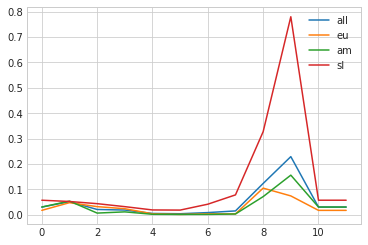

In [100]:
plt.style.use('seaborn-whitegrid')
plt.plot(vmix_all, label='all')
plt.plot(vmix_eu, label='eu')
plt.plot(vmix_am, label='am')
plt.plot(vmix_sl, label='sl')
plt.legend()

In [101]:
colors = plt.get_cmap("tab10")
np.shape(colors.colors)

(10, 3)

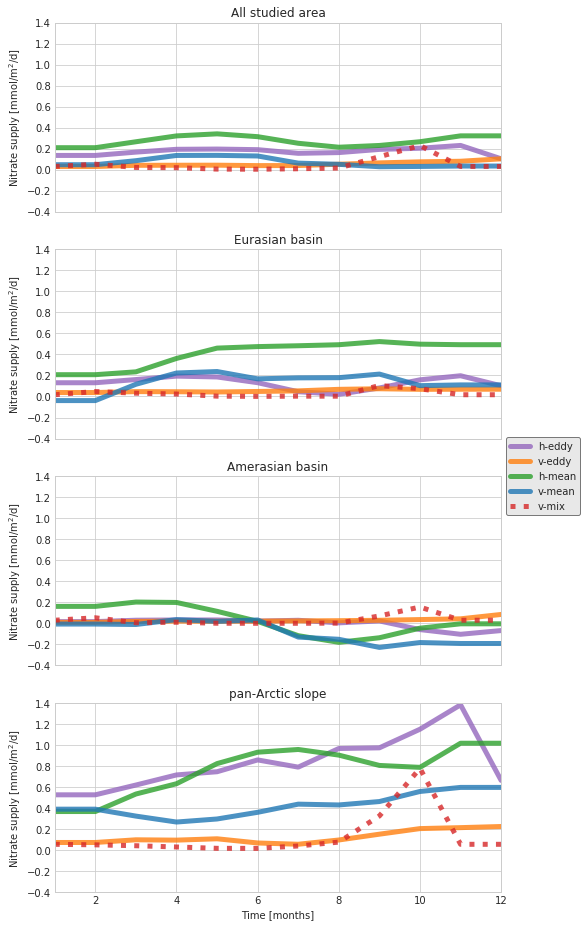

In [106]:
figsize = (8, 16)
rows,cols = 4,1
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-talk')

months = np.arange(1,13)

balance = hedyv2_all+vedyv2_all+hadv2_all+vadv2_all+vmix_all
# axs[0].plot(months,hedy_all, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[0].plot(months,vedy_all, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[0].plot(months,hadv_all, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[0].plot(months,vadv_all, lw=5, label='vmeso',color=colors(3), alpha=0.8)
axs[0].plot(months,hedyv2_all, lw=5, label='h-eddy',color=colors(4), alpha=0.8)
axs[0].plot(months,vedyv2_all, lw=5, label='v-eddy',color=colors(1), alpha=0.8)
axs[0].plot(months,hadv2_all, lw=5, label='h-mean',color=colors(2), alpha=0.8)
axs[0].plot(months,vadv2_all, lw=5, label='v-mean',color=colors(0), alpha=0.8)
axs[0].plot(months,vmix_all, ':', lw=5, label='v-mix',color=colors(3), alpha=0.8)
#axs[0].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[0].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[0].set_xlim(1,12)
axs[0].set_ylim(-0.4,1.4)
axs[0].set_title('All studied area')

balance = hedyv2_eu+vedyv2_eu+hadv2_eu+vadv2_eu+vmix_eu
# axs[1].plot(months,hedy_eu, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[1].plot(months,vedy_eu, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[1].plot(months,hadv_eu, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[1].plot(months,vadv_eu, lw=5, label='vmeso',color=colors(3), alpha=0.8)
axs[1].plot(months,hedyv2_eu, lw=5, label='h-eddy',color=colors(4), alpha=0.8)
axs[1].plot(months,vedyv2_eu, lw=5, label='v-eddy',color=colors(1), alpha=0.8)
axs[1].plot(months,hadv2_eu, lw=5, label='h-mean',color=colors(2), alpha=0.8)
axs[1].plot(months,vadv2_eu, lw=5, label='v-mean',color=colors(0), alpha=0.8)
axs[1].plot(months,vmix_eu, ':', lw=5, label='v-mix',color=colors(3), alpha=0.8)
#axs[1].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[1].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[1].set_xlim(1,12)
axs[1].set_ylim(-0.4,1.4)
axs[1].set_title('Eurasian basin')

balance = hedyv2_am+vedyv2_am+hadv2_am+vadv2_am+vmix_am
# axs[2].plot(months,hedy_am, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[2].plot(months,vedy_am, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[2].plot(months,hadv_am, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[2].plot(months,vadv_am, lw=5, label='vmeso',color=colors(3), alpha=0.8)
axs[2].plot(months,hedyv2_am, lw=5, label='h-eddy',color=colors(4), alpha=0.8)
axs[2].plot(months,vedyv2_am, lw=5, label='v-eddy',color=colors(1), alpha=0.8)
axs[2].plot(months,hadv2_am, lw=5, label='h-mean',color=colors(2), alpha=0.8)
axs[2].plot(months,vadv2_am, lw=5, label='v-mean',color=colors(0), alpha=0.8)
axs[2].plot(months,vmix_am, ':', lw=5, label='v-mix',color=colors(3), alpha=0.8)
#axs[2].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[2].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[2].set_xlim(1,12)
axs[2].set_ylim(-0.4,1.4)
axs[2].set_title('Amerasian basin')

balance = hedyv2_sl+vedyv2_sl+hadv2_sl+vadv2_sl+vmix_sl
# axs[3].plot(months,hedy_sl, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[3].plot(months,vedy_sl, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[3].plot(months,hadv_sl, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[3].plot(months,vadv_sl, lw=5, label='vmeso',color=colors(3), alpha=0.8)
axs[3].plot(months,hedyv2_sl, lw=5, label='h-eddy',color=colors(4), alpha=0.8)
axs[3].plot(months,vedyv2_sl, lw=5, label='v-eddy$',color=colors(1), alpha=0.8)
axs[3].plot(months,hadv2_sl, lw=5, label='h-mean$',color=colors(2), alpha=0.8)
axs[3].plot(months,vadv2_sl, lw=5, label='v-mean',color=colors(0), alpha=0.8)
axs[3].plot(months,vmix_sl, ':', lw=5,label='v-mix',color=colors(3), alpha=0.8)
#axs[3].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[3].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[3].set_xlim(1,12)
axs[3].set_ylim(-0.4,1.4)
axs[3].set_xlabel('Time [months]')
axs[3].set_title('pan-Arctic slope')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 1),frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)

#plt.savefig('seasonnal.png', dpi = 300, bbox_inches='tight') 